# Hierarchical Models
Kyle Kulas


In [8]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch

# Generate clusters
X, y = make_blobs(n_samples = 150,
                  n_features = 2,
                  centers = 3,
                  cluster_std = 0.5,
                  random_state = 0)

def plot_clusters(X, y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label = f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker = '*',
                    c= 'red',
                    s = 250,
                    label= 'centroids')

    plt.legend()
    plt.grid()
    plt.show()

## Hierarchical clustering
The next step is to create an object from the AgglomerativeClustering class:

In [9]:
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters =3)

In [10]:
y_hc = ac.fit_predict(X)

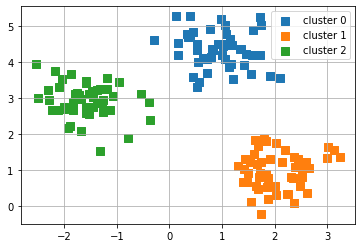

In [11]:
plot_clusters(X, y_hc)

## Dendrogram

In [15]:
def plot_dendrogram(X, method = 'ward'):
    dendrogram = sch.dendrogram(sch.linkage(X,method=method))
    plt.title('Dendrogram')
    plt.ylabel('Euclidean distances')
    plt.xlabel('Point')

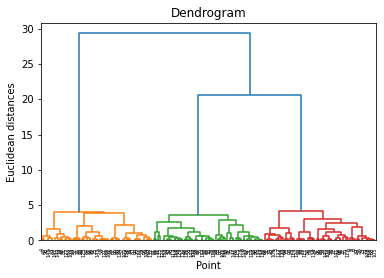

In [16]:
plot_dendrogram(X)